In [1]:
# Importing Modules 
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.metrics import structural_similarity as ssim
import cv2

In [2]:
# Using MSE & Structural Similarity Index for Comparing two Images.

In [3]:
# Mean Squared Error Function
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [4]:
# Getting Images from local Directory
img1 = cv2.imread(r'F:\DATASETS\Red_Dahlia_Flower_Background-511.jpg')
img2 = cv2.imread(r'F:\DATASETS\Red_Dahlia_Flower_Background-511.jpg')
# Color to GreyScale Conversion
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [5]:
# Resizing both images according to the smallest values of 'height' & 'width' from both images.
img1 = cv2.resize(img1, (min(img1.shape[1],img2.shape[1]),min(img1.shape[0],img2.shape[0])))
img2 = cv2.resize(img2, (min(img1.shape[1],img2.shape[1]),min(img1.shape[0],img2.shape[0])))

In [6]:
# Main function of comparison
def compare_images(imageA, imageB, title):
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # Printing results according to the condition. 
    if m>0 and s<1:
        plt.text(1300, 350,'{}{}{}{}'.format('Mis-Matched, ',round(s*100),'%',' Similarity found.'), fontsize = 22)
    else:
        plt.text(1300, 350,'{}{}{}{}'.format('Matched, ',round(s*100),'%',' Similarity found.'), fontsize = 22)

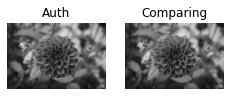

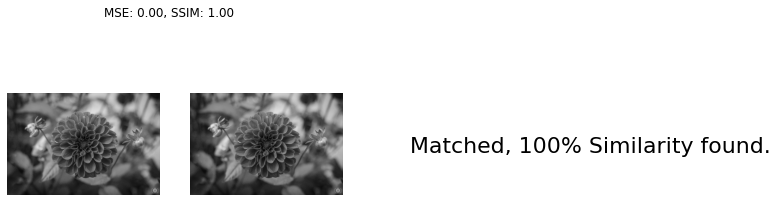

In [7]:
# initialize the figure
fig = plt.figure("Images")
images = ("Auth", img1), ("Comparing", img2)
# loop over the images
for (i, (name, image)) in enumerate(images):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")
# show the figure
plt.show()
# compare the images
# compare_images(auth, auth, "Auth vs. Auth")
compare_images(img1, img2, "Image 1 vs. Image 2")